In [208]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt



z = pd.read_csv('D:\DATASETS\Aggregation.txt', sep='\s')
z1 = pd.read_csv('D:\DATASETS\Compound.txt', sep='\s')
z2 = pd.read_excel(r"D:\DATASETS\rus_banks.xlsx")

z['ID'] = 1
z['ID'] = z['ID'].transform('cumsum')

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\gromo\AppData\Local\Temp\ipykernel_20368\1245693352.py:8: SyntaxWarning: invalid escape sequence '\D'
  z = pd.read_csv('D:\DATASETS\Aggregation.txt', sep='\s')
C:\Users\gromo\AppData\Local\Temp\ipykernel_20368\1245693352.py:8: SyntaxWarning: invalid escape sequence '\s'
  z = pd.read_csv('D:\DATASETS\Aggregation.txt', sep='\s')
C:\Users\gromo\AppData\Local\Temp\ipykernel_20368\1245693352.py:9: SyntaxWarning: invalid escape sequence '\D'
  z1 = pd.read_csv('D:\DATASETS\Compound.txt', sep='\s')
C:\Users\gromo\AppData\Local\Temp\ipykernel_20368\1245693352.py:9: SyntaxWarning: invalid es

In [209]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      788 non-null    float64
 1   x2      788 non-null    float64
 2   class   788 non-null    int64  
 3   ID      788 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 24.8 KB


<Axes: >

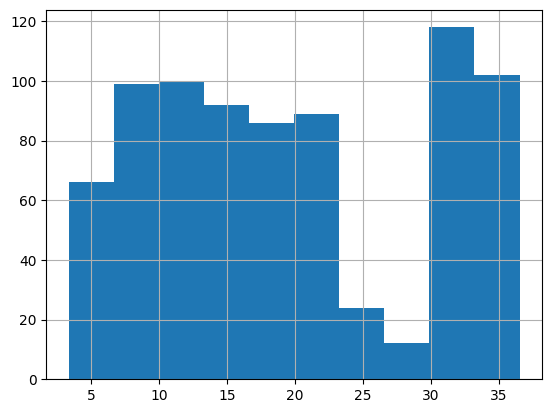

In [210]:
z['x1'].hist()

<Axes: >

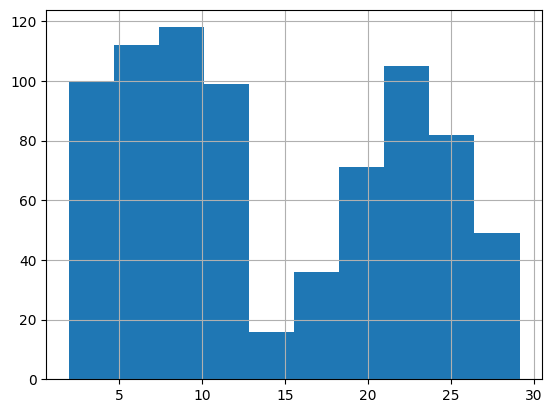

In [211]:
z['x2'].hist()

In [212]:
# Очистка от выбросов

z['x1_3sig_max'] = z['x1'].mean() + z['x1'].std() * 3
z['x1_3sig_min'] = z['x1'].mean() - z['x1'].std() * 3
z['x2_3sig_max'] = z['x2'].mean() + z['x2'].std() * 3
z['x2_3sig_min'] = z['x2'].mean() - z['x2'].std() * 3

z = z[(z['x1'] >= z['x1_3sig_min']) & ((z['x1'] <= z['x1_3sig_max']))]
z = z[(z['x2'] >= z['x2_3sig_min']) & ((z['x2'] <= z['x2_3sig_max']))]

In [213]:
z['class'].unique()

array([2, 7, 4, 3, 6, 1, 5], dtype=int64)

<Axes: xlabel='x1', ylabel='x2'>

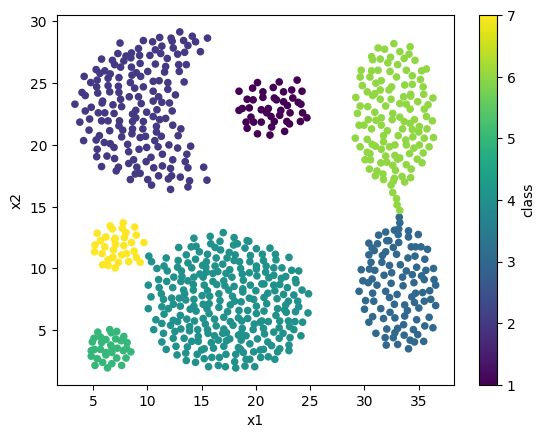

In [214]:
z.plot.scatter(x='x1', y='x2', c='class', colormap='viridis')

In [215]:
y = z['class']
x = z[['x1', 'x2']]

scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(x)

kmeans = KMeans(n_clusters=7, n_init=200).fit(X_scaled1)
labels = kmeans.labels_

print("Центры кластеров:")
print(kmeans.cluster_centers_)

Центры кластеров:
[[ 1.01065908e-03 -8.97926992e-01]
 [-1.05518985e+00  1.13606902e+00]
 [ 1.32392644e+00  9.85352042e-01]
 [ 1.36913305e+00 -6.65221287e-01]
 [-9.25685688e-01 -1.19669956e+00]
 [-8.44119719e-01 -3.09705494e-01]
 [ 1.72860073e-01  1.09462047e+00]]


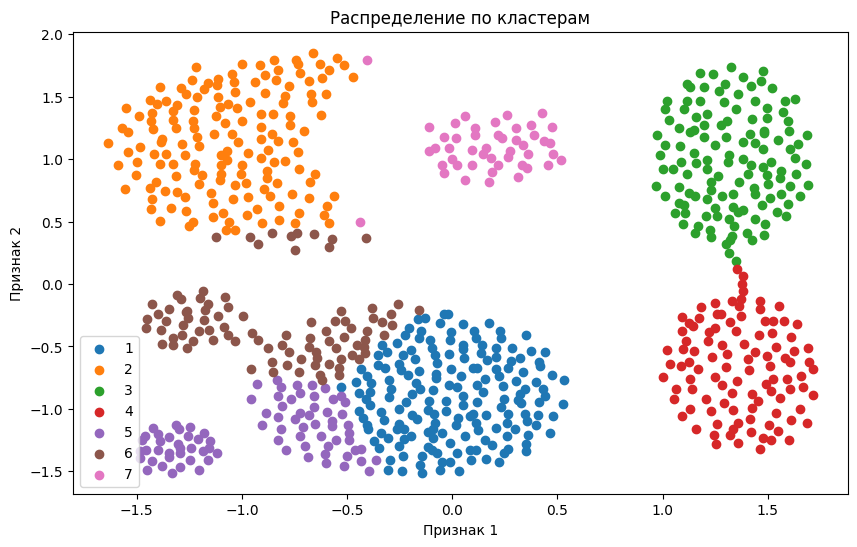

In [216]:
plt.figure(figsize=(10, 6))
for i in range(7):
    cluster_points = X_scaled1[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=i+1)
plt.legend()
plt.title('Распределение по кластерам')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

Кластерный анализ синтетического набора данных (15 кластеров)

In [217]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      399 non-null    float64
 1   x2      399 non-null    float64
 2   class   399 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [218]:
# Очистка от выбросов

z1['x1_3sig_max'] = z1['x1'].mean() + z1['x1'].std() * 3
z1['x1_3sig_min'] = z1['x1'].mean() - z1['x1'].std() * 3
z1['x2_3sig_max'] = z1['x2'].mean() + z1['x2'].std() * 3
z1['x2_3sig_min'] = z1['x2'].mean() - z1['x2'].std() * 3

z1 = z1[(z1['x1'] >= z1['x1_3sig_min']) & ((z1['x1'] <= z1['x1_3sig_max']))]
z1 = z1[(z1['x2'] >= z1['x2_3sig_min']) & ((z1['x2'] <= z1['x2_3sig_max']))]

<Axes: >

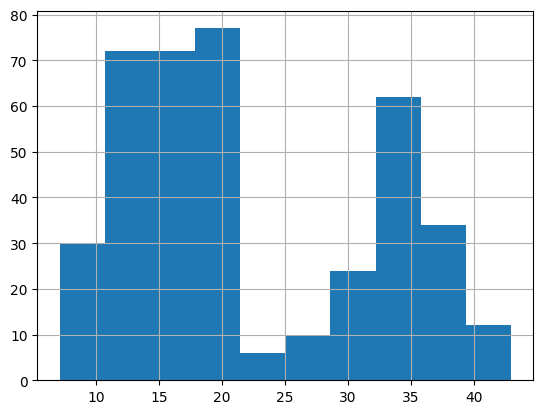

In [219]:
z1['x1'].hist()

<Axes: >

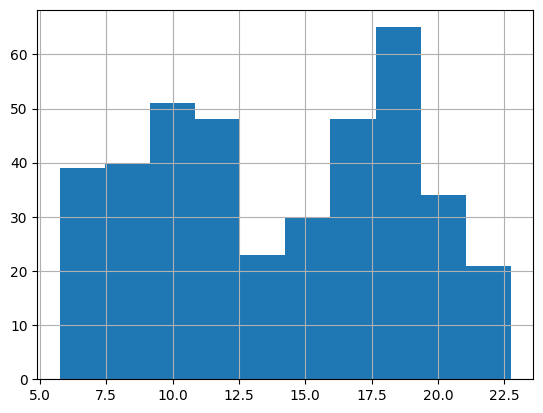

In [220]:
z1['x2'].hist()

In [221]:
z1['class'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

<Axes: xlabel='x1', ylabel='x2'>

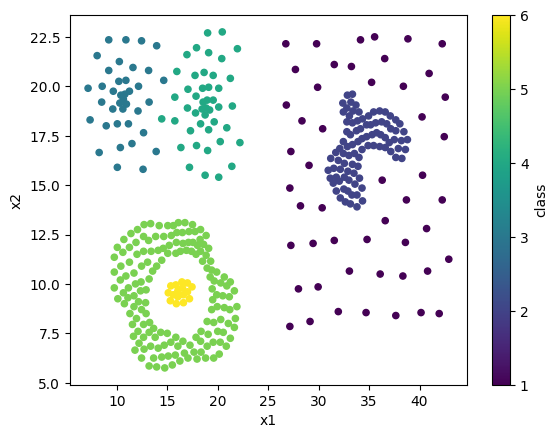

In [222]:
z1.plot.scatter(x='x1', y='x2', c='class', colormap='viridis')

In [223]:
y2 = z1['class']
x2 = z1[['x1', 'x2']]

scaler1 = StandardScaler()
X_scaled2 = scaler1.fit_transform(x2)

kmeans2 = KMeans(n_clusters=6, n_init=200).fit(X_scaled2)
labels2 = kmeans2.labels_

print("Центры кластеров:")
print(kmeans2.cluster_centers_)

Центры кластеров:
[[-1.1727833   1.1308604 ]
 [ 1.24315658 -0.36818209]
 [-0.77547345 -0.5809306 ]
 [ 1.27892115  0.79514809]
 [-0.2905716   1.1006553 ]
 [-0.53571835 -1.32818421]]


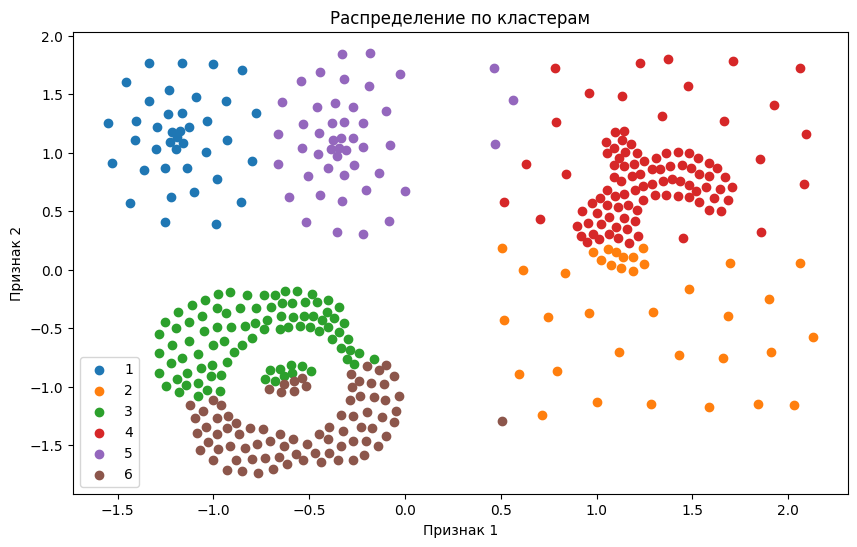

In [224]:
plt.figure(figsize=(10, 6))
for i in range(6):
    cluster_points = X_scaled2[labels2 == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=i+1)
plt.legend()
plt.title('Распределение по кластерам')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

In [225]:
silhouette1 = round(silhouette_score(X_scaled2, labels2), 4)
print('Коэффициент Силуэта:', silhouette1)

Коэффициент Силуэта: 0.4269


Таким образом, при пострении модели кластеризации K-средних на 6 кластерах мы получили похожие с имеющимися значениями кластеров кластерные силуэты. Коэффициент Силуэта свидетельствует о высоком качестве кластерзиации  

Далее проведем кластеризацию банков по данным Российских банков

In [226]:
z2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   num              371 non-null    int64 
 1   bank             371 non-null    object
 2   city             371 non-null    object
 3   actives          371 non-null    int64 
 4   own_capital      371 non-null    int64 
 5   costumers_money  371 non-null    int64 
 6   NBC_credits      371 non-null    int64 
 7   B2C_credits      371 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 23.3+ KB


In [227]:
z2['bank'].nunique()

371

In [228]:
z2['city'].nunique()

87

<Axes: >

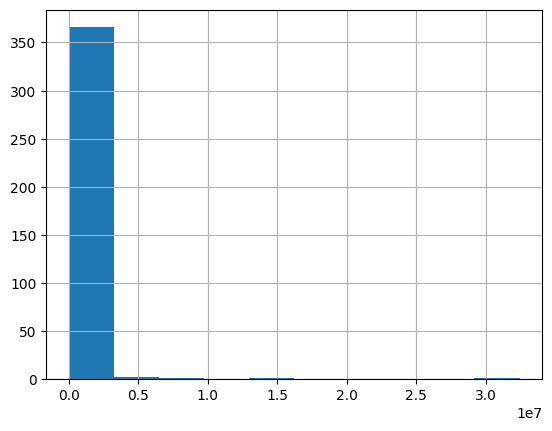

In [229]:
z2['actives'].hist()

<Axes: >

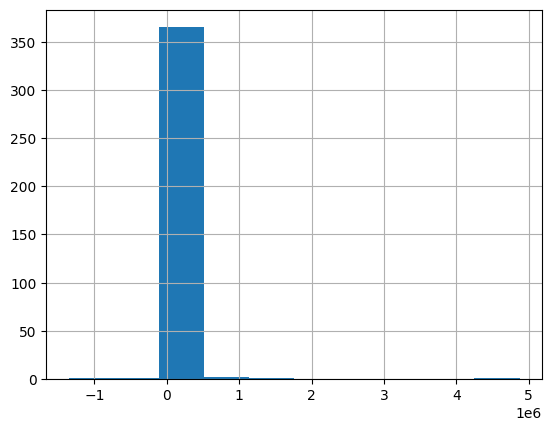

In [230]:
z2['own_capital'].hist()

<Axes: >

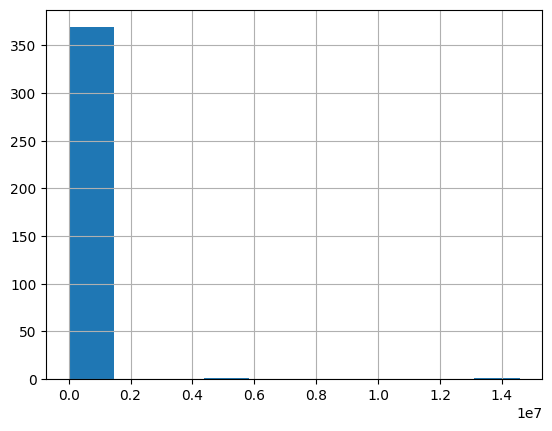

In [231]:
z2['costumers_money'].hist()

<Axes: >

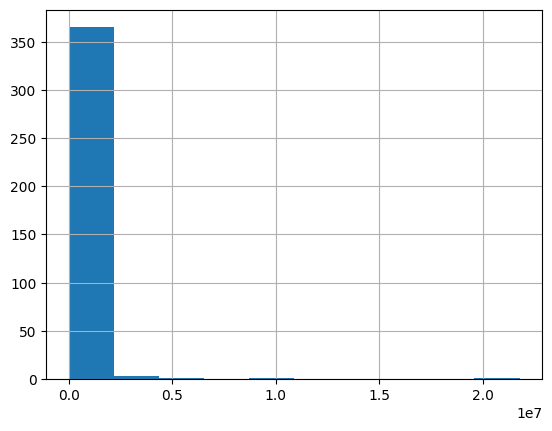

In [232]:
z2['NBC_credits'].hist()

<Axes: >

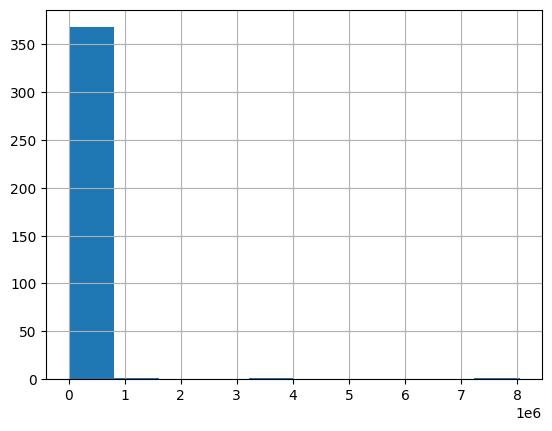

In [233]:
z2['B2C_credits '].hist()

In [234]:
# Очистка от выбросов

z2['actives_3sig_max'] = z2['actives'].mean() + z2['actives'].std() * 3
z2['actives_3sig_min'] = z2['actives'].mean() - z2['actives'].std() * 3
z2['own_capital_3sig_max'] = z2['own_capital'].mean() + z2['own_capital'].std() * 3
z2['own_capital_3sig_min'] = z2['own_capital'].mean() - z2['own_capital'].std() * 3
z2['costumers_money_3sig_max'] = z2['costumers_money'].mean() + z2['costumers_money'].std() * 3
z2['costumers_money_3sig_min'] = z2['costumers_money'].mean() - z2['costumers_money'].std() * 3
z2['NBC_credits_3sig_max'] = z2['NBC_credits'].mean() + z2['NBC_credits'].std() * 3
z2['NBC_credits_3sig_min'] = z2['NBC_credits'].mean() - z2['NBC_credits'].std() * 3
z2['B2C_credits_3sig_max'] = z2['B2C_credits '].mean() + z2['B2C_credits '].std() * 3
z2['B2C_credits_3sig_min'] = z2['B2C_credits '].mean() - z2['B2C_credits '].std() * 3

z2 = z2[(z2['actives'] >= z2['actives_3sig_min']) & ((z2['actives'] <= z2['actives_3sig_max']))]
z2 = z2[(z2['own_capital'] >= z2['own_capital_3sig_min']) & ((z2['own_capital'] <= z2['own_capital_3sig_max']))]
z2 = z2[(z2['costumers_money'] >= z2['costumers_money_3sig_min']) & ((z2['costumers_money'] <= z2['costumers_money_3sig_max']))]
z2 = z2[(z2['NBC_credits'] >= z2['NBC_credits_3sig_min']) & ((z2['NBC_credits'] <= z2['NBC_credits_3sig_max']))]
z2 = z2[(z2['B2C_credits '] >= z2['B2C_credits_3sig_min']) & ((z2['B2C_credits '] <= z2['B2C_credits_3sig_max']))]

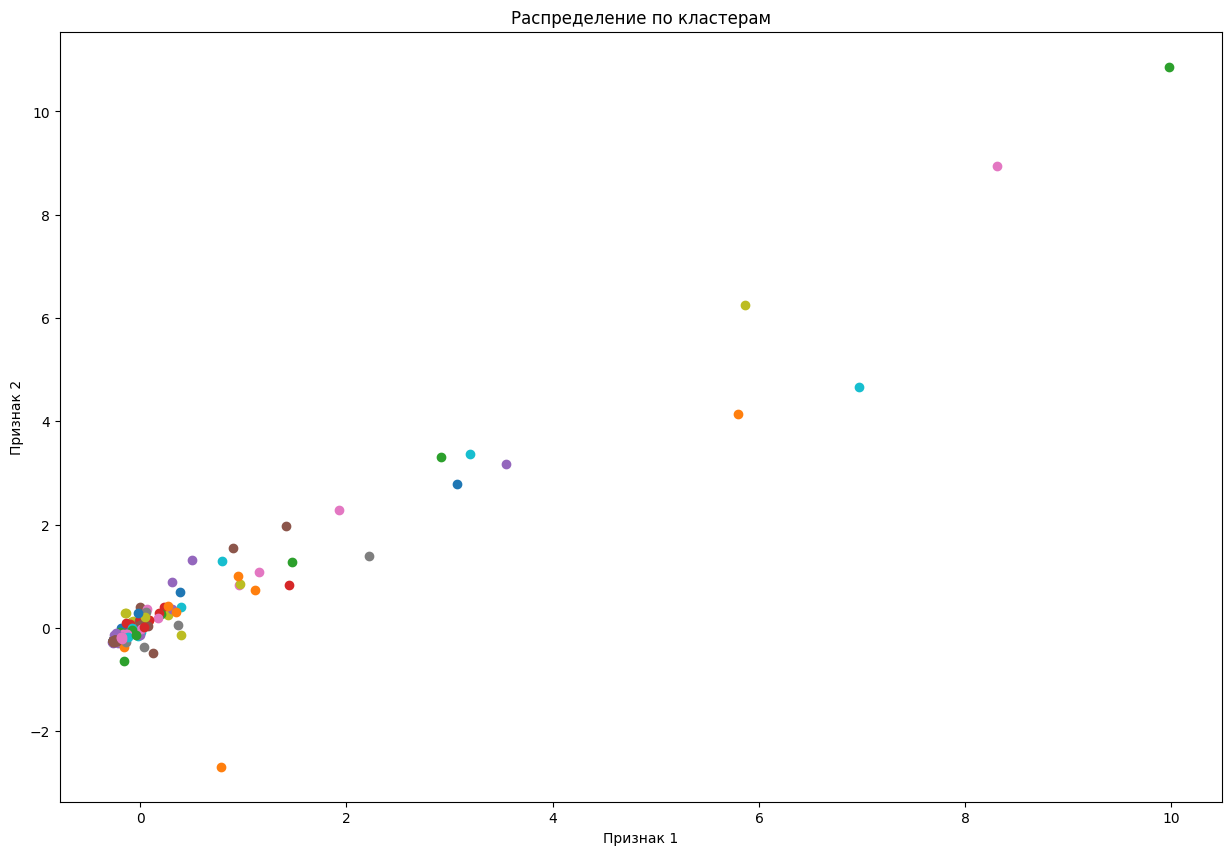

Коэффициент Силуэта: 0.3391


In [235]:
# Кластеризация для 87 кластеров (по городам)
x3 = z2[['actives', 'own_capital', 'costumers_money', 'NBC_credits', 'B2C_credits ']]

scaler3 = StandardScaler()
X_scaled3 = scaler3.fit_transform(x3)

kmeans3 = KMeans(n_clusters=87, n_init=200).fit(X_scaled3)
labels3 = kmeans3.labels_

plt.figure(figsize=(15, 10))
for i in range(87):
    cluster_points = X_scaled3[labels3 == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=i+1)
plt.title('Распределение по кластерам')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()
silhouette3 = round(silhouette_score(X_scaled3, labels3), 4)
print('Коэффициент Силуэта:', silhouette3)

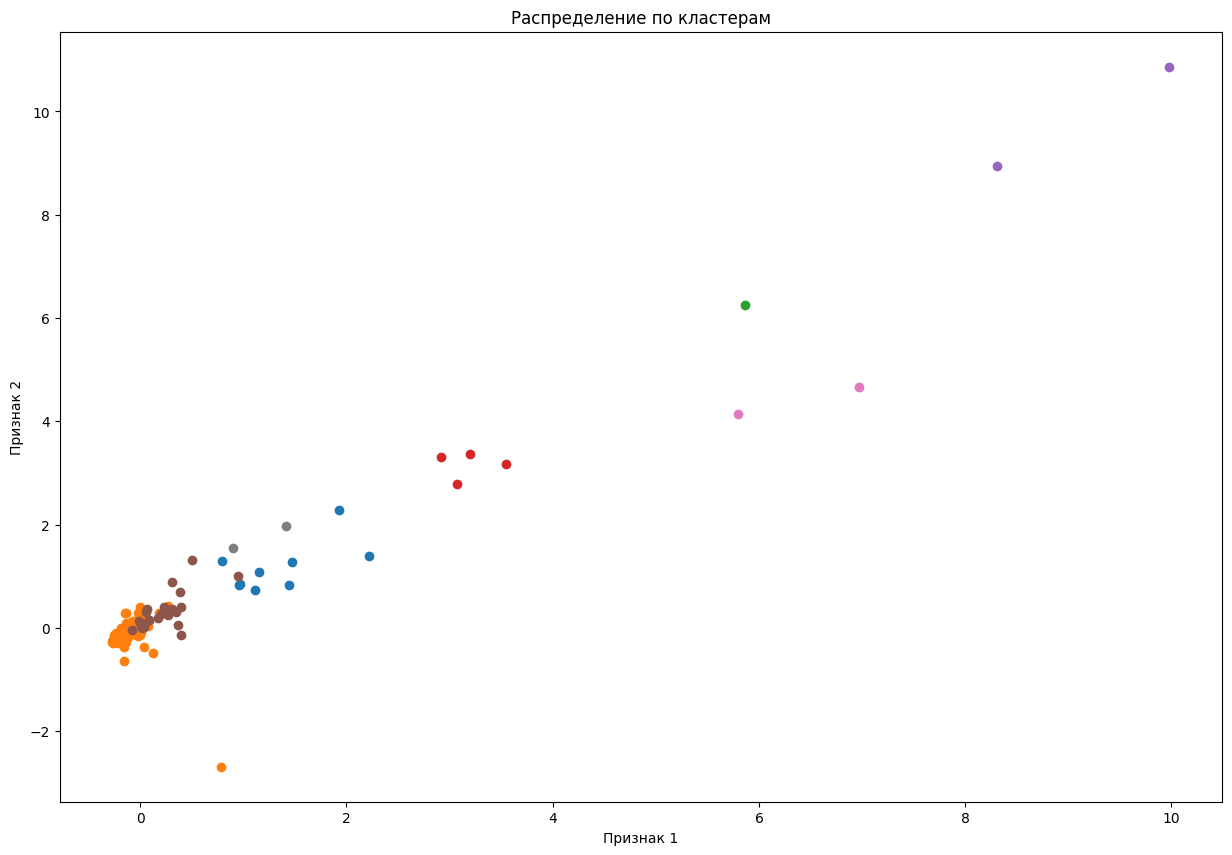

Коэффициент Силуэта: 0.7909


In [ ]:
# Кластеризация для 8 кластеров (по федеральным округам)
x3 = z2[['actives', 'own_capital', 'costumers_money', 'NBC_credits', 'B2C_credits ']]

scaler4 = StandardScaler()
X_scaled4 = scaler3.fit_transform(x3)

kmeans4 = KMeans(n_clusters=8, n_init=200).fit(X_scaled3)
labels4 = kmeans4.labels_

plt.figure(figsize=(15, 10))
for i in range(8):
    cluster_points = X_scaled3[labels4 == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=i+1)
plt.title('Распределение по кластерам')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()
silhouette4 = round(silhouette_score(X_scaled4, labels4), 4)
print('Коэффициент Силуэта:', silhouette4)

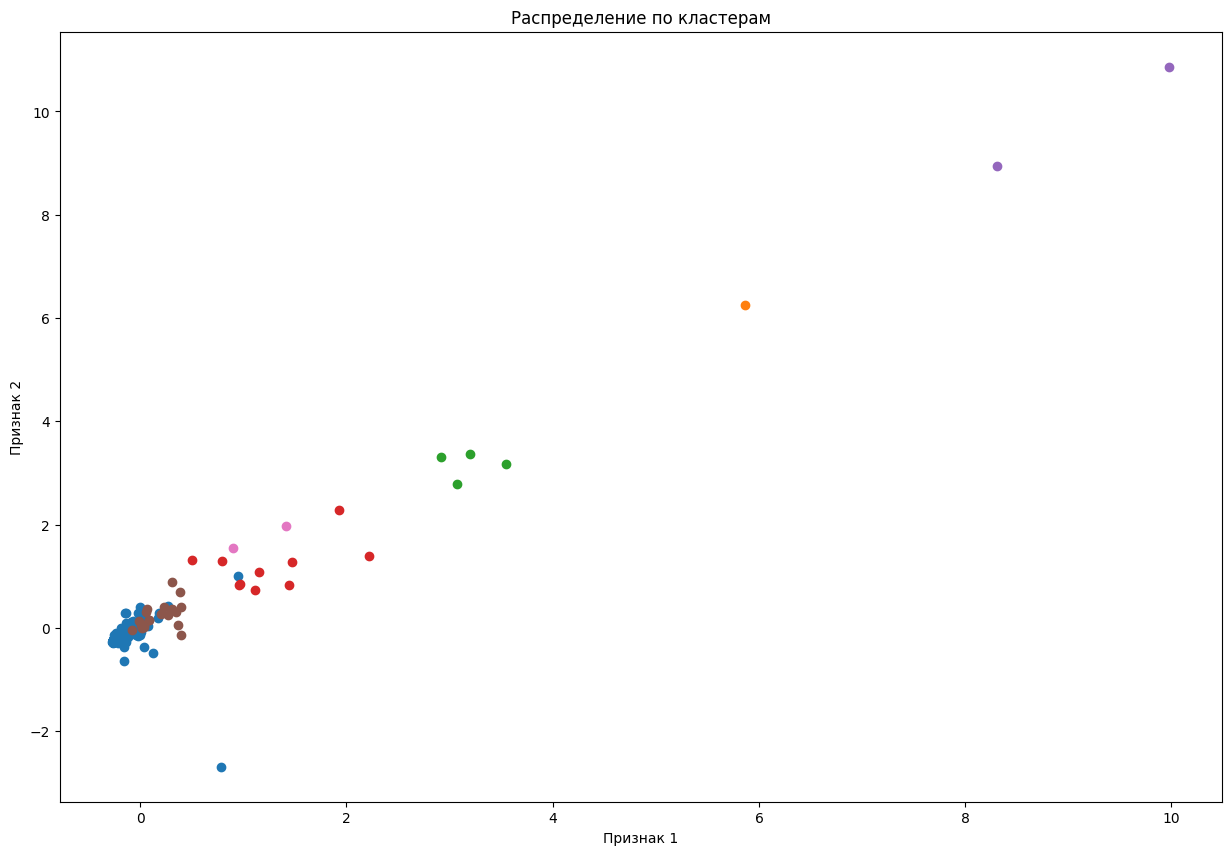

Коэффициент Силуэта: 0.7922


In [238]:
# Кластеризация для 7 кластеров
x3 = z2[['actives', 'own_capital', 'costumers_money', 'NBC_credits', 'B2C_credits ']]

scaler5 = StandardScaler()
X_scaled5 = scaler5.fit_transform(x3)

kmeans5 = KMeans(n_clusters=8, n_init=200).fit(X_scaled5)
labels5 = kmeans5.labels_

plt.figure(figsize=(15, 10))
for i in range(7):
    cluster_points = X_scaled3[labels5 == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=i+1)
plt.title('Распределение по кластерам')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()
silhouette5 = round(silhouette_score(X_scaled5, labels5), 4)
print('Коэффициент Силуэта:', silhouette5)